# Modelo Predictivo Noticias Falsas NLP

In [1]:
import pandas as pd
import re
import spacy
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [5]:
# Cargamos los dataset, limpiamos los separadores y agregamos titulos a las columnas

train = pd.read_csv("data/training_data.csv", sep="\t", header=None, names=["label", "title"])
test = pd.read_csv("data/testing_data.csv", sep="\t", header=None, names=["label", "title"])

In [17]:
#  Utilizaremos la lemantizacion multilingüe (español e inglés) usando spaCy

nlp_es = spacy.load("es_core_news_sm", disable=["parser", "ner"])
nlp_en = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Función para detectar el idioma del texto

def detectar_idioma_simple(texto):
    texto = texto.lower()
    if any(p in texto for p in [" el ", " la ", " los ", " una ", " esto ", " que "]):
        return "es"
    return "en"

# Creamos una función para limpiar el texto y lemantizarlo

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto)
    texto = re.sub(r'\@[\w]*', '', texto)
    texto = re.sub(r'\#', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = texto.strip()

    if not texto or len(texto.split()) < 1:
        return ""

    idioma = detectar_idioma_simple(texto)
    nlp = nlp_es if idioma == "es" else nlp_en
    doc = nlp(texto)
    return " ".join([token.lemma_ for token in doc])


## Vectorizamos y entrenamos el primer modelo Random Forest

In [19]:
train["clean_text"] = train["title"].apply(limpiar_texto) # Aplicamos la función de limpieza y lematización

In [20]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train["clean_text"])
y = train["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3529
           1       0.93      0.92      0.93      3302

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



 El modelo tiene una precision con un 0.93 % procederemos a compararlo con otro modelo predictivo en este caso
 regresion lineal


In [21]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) 
X = vectorizer.fit_transform(train['clean_text'])
y = train['label']

# División en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3529
           1       0.91      0.94      0.93      3302

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



Obtenemos un porcentaje de precision mayor con el segundo modelo, por ende usaremos el segundo modelo para la predicción de los datos de prueba.

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3529
           1       0.91      0.94      0.93      3302

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



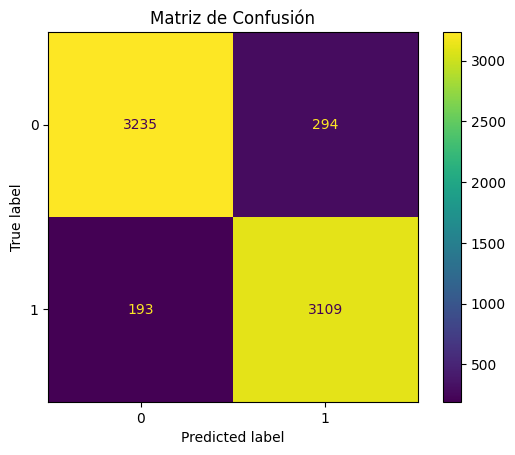

In [24]:
y_pred = model.predict(X_val)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()